In [1]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
plt.rc('font',size=16)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy.lib.recfunctions as rfn
import illustris_python as il
import scipy.stats as st
from pandas import *
import pandas as pd
import warnings
from astropy.table import Table
warnings.filterwarnings('ignore')
little_h = 0.6774

dir_current = globals()['_dh'][0]
basePath = dir_current+'/../data/'

## Catalog Explore

In [3]:
fileName = 'TNG100-1_99_galaxy_scale_len_height_5r.fits' 
cat = Table.read(basePath+fileName, format='fits')
data = cat.to_pandas()

data.head()

,gal_id,f_disk_2d,f_disk_1d_2comp_1,f_disk_1d_2comp_2,f_disk_1d_2comp_counter,f_disk_1d_1comp,f_disk_1d_1comp_counter,chisq_1comp,chisq_2comp,bulge_r_1/2,bulge_r_1/2_err,bulge_index,bulge_index_err,disk_r_1/2,disk_r_1/2_err,mass
0,0.0,0.254996,2.961539e-01,1.441971e-02,0.109338,2.471397e-01,9.351949e-02,59.213467,55.797179,56.814302,3.211551,6.159505,0.600092,1000.000000,1000.000000,3.705585e+12
1,1.0,0.000000,1.631369e-14,1.631369e-15,0.003169,2.921106e-16,3.169137e-03,192.525198,192.525198,17.024719,0.646963,3.023050,0.168201,1000.000000,1000.000000,5.587917e+11
2,2.0,0.146807,1.552197e-01,7.865747e-05,0.080230,1.552988e-01,8.023012e-02,50.917631,50.917631,17.479631,1.133279,5.510873,0.623267,1000.000000,1000.000000,6.271396e+11
3,3.0,0.568697,2.055699e-01,3.471772e-01,0.038192,4.276057e-01,3.077587e-02,1344.788595,95.531291,4.861869,0.602889,3.156987,0.415410,8.184247,0.277411,1.715515e+11
4,4.0,0.189791,1.494139e-10,1.538097e-01,0.002356,1.414949e-01,1.621830e-44,176.055814,322.994629,9.897706,0.435469,4.281950,0.317183,1000.000000,1000.000000,1.333404e+11


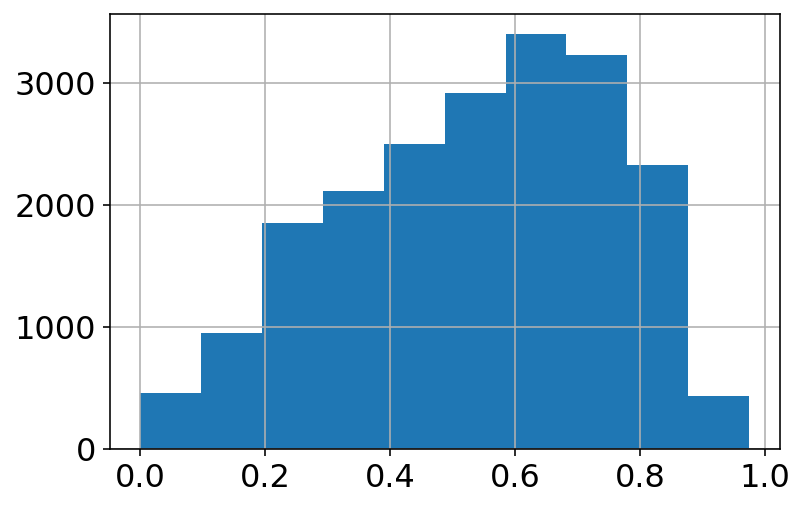

In [4]:
data['f_disk_2d'].hist()

In [5]:
# rank galaxies with mass > 1e10 by their f_disk_2d values.
threshold_mass = 1e10
data[ data['mass']>threshold_mass ].sort_values(by=['f_disk_2d'], ascending=False)[['gal_id', 'f_disk_2d','mass']][0:10]

,gal_id,f_disk_2d,mass
5936,322162.0,0.942437,2.742913e+10
10272,495214.0,0.940321,3.767052e+10
12846,556668.0,0.937655,2.261175e+10
10753,509468.0,0.937429,4.950812e+10
7432,388820.0,0.937206,2.720105e+10
7307,383508.0,0.935810,3.864432e+10
8190,421835.0,0.935765,7.455241e+10
10078,489054.0,0.934498,3.877748e+10
10591,504837.0,0.934397,4.628448e+10
10839,511858.0,0.933706,4.519724e+10


## ------ Connect to TNGcube tools ------

In [6]:
import sys
import os

dir_current = globals()['_dh'][0]
dir_TNGcube = dir_current+'/../../TNGcube/'
print('directory to TNGcube:', dir_TNGcube)

sys.path.append(dir_TNGcube)
from queryTNG import *

directory to TNGcube: /Users/hhg/Research/kinematic_lensing/repo/gal_decomp_paper/HH_notebooks/../../TNGcube/


### QueryTNG

In [7]:
QTNG = QueryTNG(simName='TNG100-1', snapNum=99)

### QTNG.query_subhaloInfo(subhaloID)

In [8]:
# fail with TNGmock's autoTune
QTNG.query_subhaloInfo(subhaloID=322162)

{'snap': 99,
 'id': 322162,
 'mass': 51.5331,
 'stellarphotometrics_r': -21.4233,
 'vmax': 178.893,
 'vmaxrad': 22.9488,
 'mass_log_msun': 11.88124107614507,
 'cm': array([17457.1, 12953.1, 74427. ]),
 'pos': array([17457.1, 12949. , 74426.4]),
 'spin': array([  340.4  , -1268.17 ,  -363.876]),
 'vel': array([ 126.65  ,  -43.2793, -165.079 ])}

In [9]:
QTNG.query_subhaloInfo(subhaloID=504837)

{'snap': 99,
 'id': 504837,
 'mass': 71.9928,
 'stellarphotometrics_r': -21.9286,
 'vmax': 203.984,
 'vmaxrad': 14.9868,
 'mass_log_msun': 12.026443872502849,
 'cm': array([ 8265.47, 14101.1 , 23494.  ]),
 'pos': array([ 8263.13, 14102.5 , 23493.3 ]),
 'spin': array([ 596.807, -846.946,  482.884]),
 'vel': array([-165.85 ,  230.601,  131.671])}

In [10]:
QTNG.query_subhaloInfo(subhaloID=495214)

{'snap': 99,
 'id': 495214,
 'mass': 72.8475,
 'stellarphotometrics_r': -21.5224,
 'vmax': 198.817,
 'vmaxrad': 17.8408,
 'mass_log_msun': 12.031569459818883,
 'cm': array([64406.5 ,  9515.53, 32970.8 ]),
 'pos': array([64401.2 ,  9517.83, 32969.5 ]),
 'spin': array([-1075.43, -1331.37,  1401.77]),
 'vel': array([123.318 , 103.348 ,  89.4325])}

### Download subhalo info and its snapshot particles

In [11]:
subhaloID = 504837
catalog = QTNG.download_subhalos(subhaloIDs=[subhaloID])

http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/504837/cutout.hdf5


In [12]:
catalog[subhaloID].info

{'snap': 99,
 'id': 504837,
 'mass': 71.9928,
 'stellarphotometrics_r': -21.9286,
 'vmax': 203.984,
 'vmaxrad': 14.9868,
 'mass_log_msun': 12.026443872502849,
 'cm': array([ 8265.47, 14101.1 , 23494.  ]),
 'pos': array([ 8263.13, 14102.5 , 23493.3 ]),
 'spin': array([ 596.807, -846.946,  482.884]),
 'vel': array([-165.85 ,  230.601,  131.671])}

In [13]:
# catalog[subhaloID].snap['gas'].keys()
# catalog[subhaloID].snap['stars'].keys()

# ------ make mocks with TNGmock ------

In [14]:
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"

sys.path.append(dir_KLens)
from KLtool import *

sys.path.append(dir_TNGcube)
from TNGcube import *

sys.path.append(dir_BinnedFit)
from binnedFit_utilities import lambda_to_velocity, velocity_to_lambda

In [15]:
filename_pkl = f'subhalo_{subhaloID}.pkl'
subhalo = pickle.load(open(filename_pkl, 'rb'))

In [16]:
pars = {}
pars['spinR'] = [0, 0, -1]
pars['sini'] = 0.8
pars['theta_int'] = 0.       # np.pi/6.
pars['g1'] = 0.0
pars['g2'] = 0.0
pars['redshift'] = 0.3
pars['psfFWHM'] = 0.1
pars['sigma_thermal'] = 16.  # [unit: km/s]

pars['slitAngles'] = [0., np.pi/2]

lambda_cen0 = ParametersTNG.lineLambda0['Halpha']
#lambda_cen0 = (lineLambda0['OIIa']+lineLambda0['OIIb'])/2.

pars['lambda_cen'] = (1+pars['redshift'])*lambda_cen0

In [17]:
pars['expTime'] = 30.*60.              # [unit: sec]
pars['area'] = 3.14 * (1000./2.)**2    # telescope area [unit: cm2]

pars['ref_SDSS_lineL'] = 3.*1e-17      # [unit: erg/s/Angstrom/cm2]    # * u.erg/u.second/u.Angstrom/u.cm**2

fiber_SDSS = np.pi * 1.5**2.           # fiber size [unit: arcsec2]
refSDSSspec = pars['ref_SDSS_lineL'] * u.erg/u.second/u.Angstrom/u.cm**2
refSDSSspec = refSDSSspec.to(u.erg/u.second/u.nm/u.cm**2)
print('reference SDSS fiber spec:', refSDSSspec)

pars['lineflux'] = refSDSSspec.value / fiber_SDSS  # [unit: erg/s/cm2/nm/arcsec2]
pars['lineflux']

pars['ngrid'] = 256

reference SDSS fiber spec: 2.9999999999999994e-16 erg / (cm2 nm s)


In [18]:
par_meta = {}
# optimal par_meta for subhaloID=46, snap=75
#par_meta['theta'] = 15. *np.pi/180.
#par_meta['dx'] = [0.8,1.3,0]
#par_meta['dv'] = [0.0,0.,4.5]

par_meta['theta'] = 0.*np.pi/180.
par_meta['dx'] = [0.0, 0.0, 0.0]
par_meta['dv'] = [0.0, 0.0, 0.0]

In [19]:
mock = TNGmock(pars=pars, subhalo=subhalo, par_meta=par_meta, auto_tune=True)

residual PA = -30.292 deg. (auto-corrected)
residual center offset: (0.026, -0.202) [arcsec] (auto-corrected)
residual center offset: (0.105, -0.816) [ckpc] (auto-corrected)


## generate a noiseless image to check the optimal major and minor axes of slitAngles

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f802916efd0>)

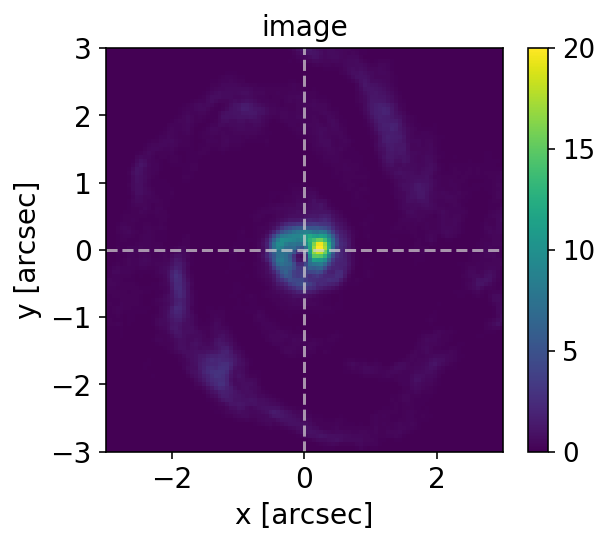

In [20]:
#image0 = mock.gen_mock_image(weights='photometry', band='r', noise_mode=0)
image0 = mock.gen_mock_image(weights='line', noise_mode=0)
#image0 = mock.gen_mock_image(weights='mass', noise_mode=0)
image0.display(xlim=[-3,3])

In [21]:
gsImg0 = image0.gen_galsimImage()
moments0 = gsImg0.FindAdaptiveMom()
print('moments:')
print(moments0)
print('shapes:')
print(moments0.observed_shape)

moments:
galsim.hsm.ShapeData(image_bounds=galsim.BoundsI(xmin=0, xmax=255, ymin=0, ymax=255), moments_status=0, observed_shape=galsim.Shear((0.1611710946988598-0.0026383693883144763j)), moments_sigma=4.809751987457275, moments_amp=1899.3707275390625, moments_centroid=galsim.PositionD(x=129.19033996400617, y=128.18084691762684), moments_rho4=2.059540049080786, moments_n_iter=38, correction_status=-10)
shapes:
galsim.Shear(g1=0.1611710946988598,g2=-0.0026383693883144763)


In [22]:
slitAng_major_p = moments0.observed_shape.beta.rad 
slitAng_minor_p = slitAng_major_p + np.pi/2.

print(f"slitAng_major : {moments0.observed_shape.beta.deg:.3f}")
print(f"slitAng_minor : {moments0.observed_shape.beta.deg+90:.3f}")

mock.Pars.fid['slitAngles'] = np.array([slitAng_major_p, slitAng_minor_p])

slitAng_major : -0.469
slitAng_minor : 89.531


### default auto mock generation

In [23]:
dataInfo = mock.gen_mock_data(noise_mode=0)

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8008939610>)

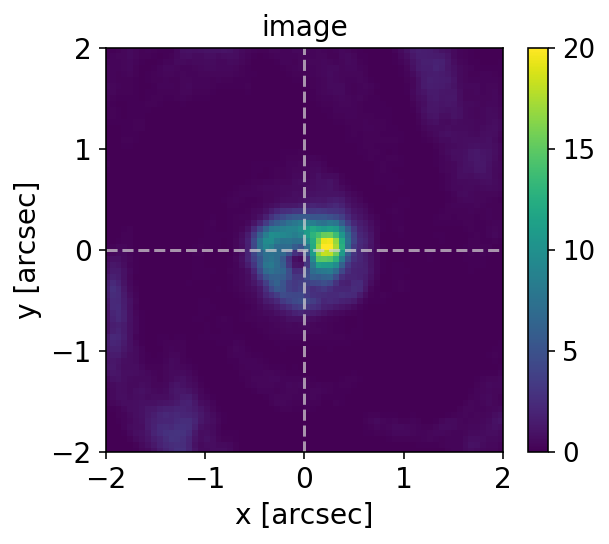

In [24]:
dataInfo['image'].display(xlim=[-2., 2.])

time cost in gaussFit_spec2D: 0.28661298751831055 (secs)


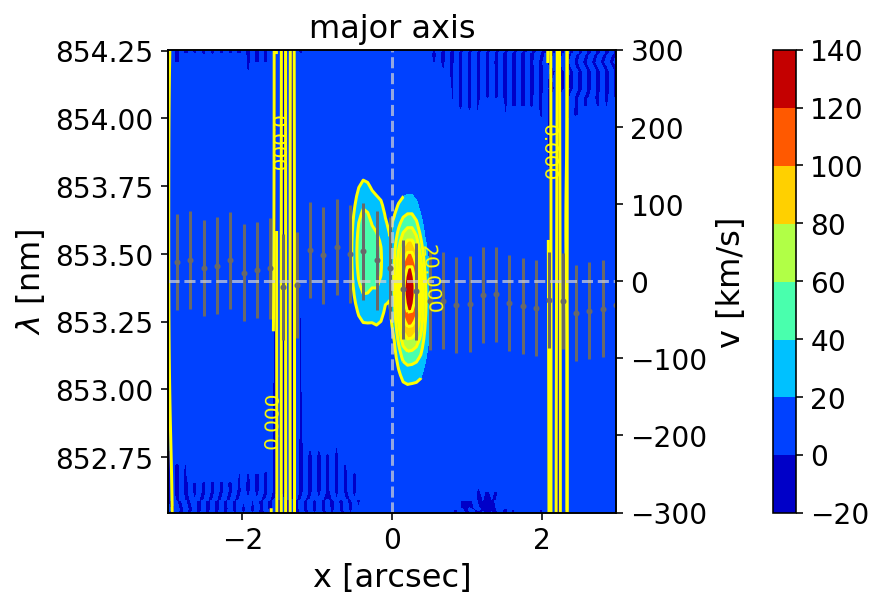

In [25]:
model_major = dataInfo['spec'][0].GF.model
fig, ax = dataInfo['spec'][0].display(xlim=[-3, 3], vlim=[-300, 300], mark_fit=True, model=model_major, title='major axis')

time cost in gaussFit_spec2D: 0.28492069244384766 (secs)


(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f80685f4e10>)

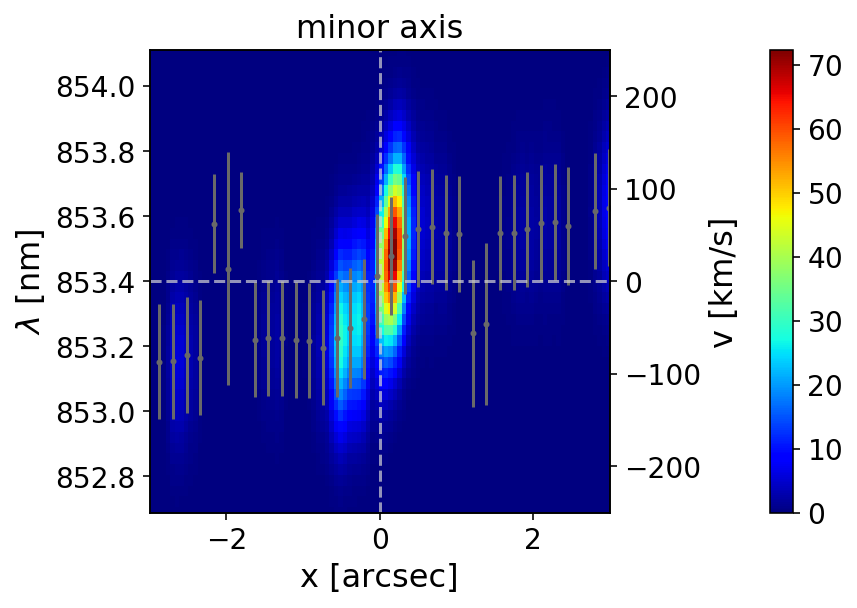

In [26]:
model_minor = dataInfo['spec'][1].GF.model #, model=model_minor
dataInfo['spec'][1].display(xlim=[-3., 3], vlim=[-250, 250], mark_fit=True, title='minor axis')

(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f80294d8bd0>)

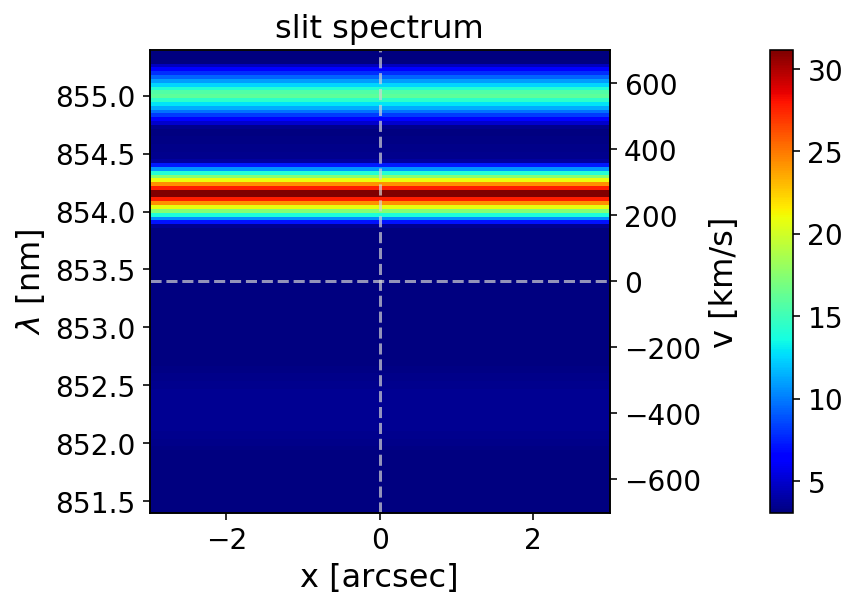

In [27]:
spec2D_sky = Spec2D(array=mock.sky.spec2D_arr, array_var=mock.sky.spec2D_arr, 
                    spaceGrid=mock.specCube.spaceGrid, lambdaGrid=mock.specCube.lambdaGrid, 
                    line_species=dataInfo['line_species'], z=mock.z, auto_cut=False)
spec2D_sky.display(xlim=[-3.,3.])